In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
vectorizer = TfidfVectorizer()
docs = [
    "Machine learning is amazing",
    "Deep learning and machine learning are related",
    "I love programming in Python",
]

# Transform documents into TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names_out()
word_importance = tfidf_matrix.toarray()
df = pd.DataFrame(word_importance, columns=feature_names)
df

,amazing,and,are,deep,in,is,learning,love,machine,programming,python,related
0,0.562829,0.000000,0.000000,0.000000,0.0,0.562829,0.428046,0.0,0.428046,0.0,0.0,0.000000
1,0.000000,0.380914,0.380914,0.380914,0.0,0.000000,0.579391,0.0,0.289695,0.0,0.0,0.380914
2,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.5,0.5,0.000000


In [8]:
words = {feature_names[j] for i in range(len(docs)) for j in range(len(feature_names)) if df.iloc[i, j] > 0.5}
words

{'amazing', 'is', 'learning'}

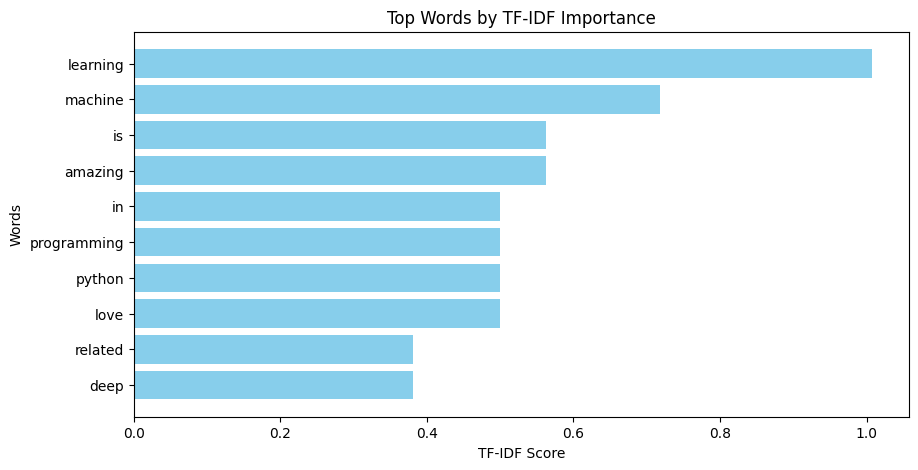

In [14]:
word_importance = np.sum(tfidf_matrix.toarray(), axis=0)

# Sort words by importance
sorted_indices = np.argsort(word_importance)[::-1]  # Sort descending
sorted_words = feature_names[sorted_indices]
sorted_scores = word_importance[sorted_indices]

# Determine how many words to plot (avoid indexing out of range)
num_words_to_plot = min(10, len(sorted_words))  # Plot up to 10 words but not more than available

# Plot the top words
plt.figure(figsize=(10, 5))
plt.barh(sorted_words[:num_words_to_plot], sorted_scores[:num_words_to_plot], color="skyblue")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title("Top Words by TF-IDF Importance")
plt.gca().invert_yaxis()  # Invert to show the highest value at the top
plt.show()

sentiment classification

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



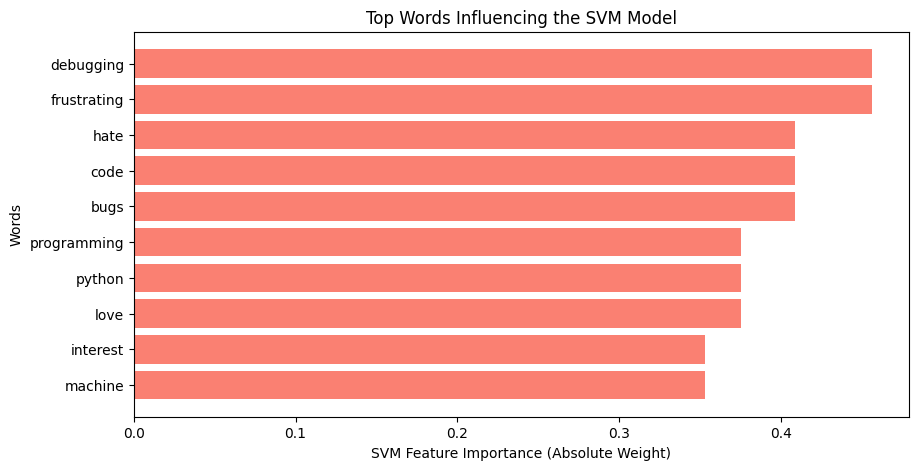

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC  # More stable than SVC for text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
texts = [
    "Machine learning is amazing",
    "Deep learning and AI are the future", 
    "I love programming in Python", 
    "I hate bugs in my code",  
    "Debugging is frustrating",  
    "Syntax errors are annoying",  
    "My interest in machine learning is growing", 
]

labels = [1, 1, 1, 0, 0, 0,1]  # 1 = Positive, 0 = Negative
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)  # Use transform (not fit_transform) on test data

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

if hasattr(svm_model, "coef_"):
    importance = np.abs(svm_model.coef_.copy()).flatten()
    feature_names = vectorizer.get_feature_names_out()

    # Sort features by importance
    sorted_indices = np.argsort(importance)[::-1]
    sorted_words = feature_names[sorted_indices]
    sorted_scores = importance[sorted_indices]

    # Plot top words by importance
    num_words_to_plot = min(10, len(sorted_words))
    
    plt.figure(figsize=(10, 5))
    plt.barh(sorted_words[:num_words_to_plot], sorted_scores[:num_words_to_plot], color="salmon")
    plt.xlabel("SVM Feature Importance (Absolute Weight)")
    plt.ylabel("Words")
    plt.title("Top Words Influencing the SVM Model")
    plt.gca().invert_yaxis()
    plt.show()
